In [8]:
import matplotlib.pyplot as plt
import numpy as np
from utils import compute_contraction_noise, compute_continuity_noise, compute_score_bounds
from scipy.stats import norm
from agent_distribution import AgentDistribution

In [9]:
np.random.seed(0)

In [10]:
def create_generic_agent_dist(n, n_types, d):
    etas = np.random.uniform(3.0, 8.0, n_types * d).reshape(n_types, d, 1)
    gammas = np.random.uniform(0.05, 5.0, n_types * d).reshape(n_types, d, 1)
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

In [11]:
agent_dist_10000 = create_generic_agent_dist(n=10000, n_types=10, d=2)
agent_dist_1000 = AgentDistribution(n=1000, n_types=10, d=2, types=agent_dist_10000.types)
agent_dist_100 = AgentDistribution(n=100, n_types=10, d=2, types=agent_dist_10000.types)

In [12]:
beta = np.array([0.701, 0.701]).reshape(2, 1)
sigma = compute_contraction_noise(agent_dist_100)
q = 0.7

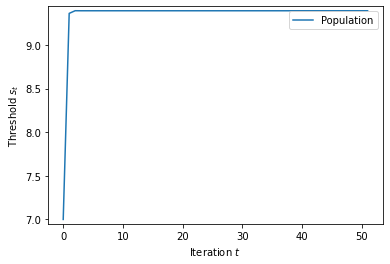

In [13]:
true_st = agent_dist_100.quantile_fixed_point_iteration_true_distribution(beta, sigma, q, maxiter=51, s0=7., plot=True)

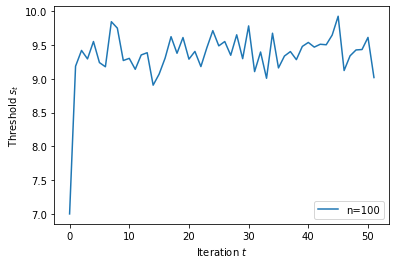

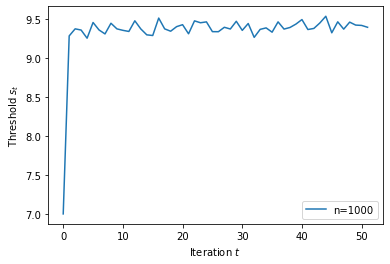

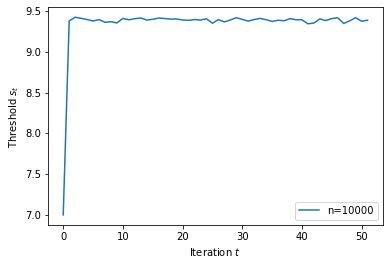

In [14]:
st_100 = agent_dist_100.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)
st_1000 = agent_dist_1000.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)
st_10000 = agent_dist_10000.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)

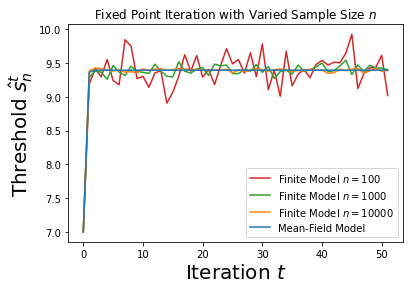

In [15]:
plt.plot(list(range(len(true_st))), st_100, label="Finite Model "+ r"$n=100$", c="tab:red")
plt.plot(list(range(len(true_st))), st_1000, label="Finite Model "+ r"$n=1000$", c="tab:green")
plt.plot(list(range(len(true_st))), st_10000, label="Finite Model "+ r"$n=10000$", c="tab:orange")
plt.plot(list(range(len(true_st))), true_st, label="Mean-Field Model", c="tab:blue")

plt.legend()
plt.xlabel("Iteration " + r"$t$")
plt.ylabel("Threshold " + r"$\hat{s}^t_{n}$")
plt.title("Fixed Point Iteration with Varied Sample Size " + r"$n$")
plt.savefig("figs/multi_agent_type_fpi.pdf")

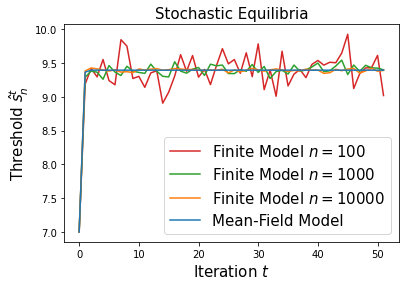

In [22]:
plt.plot(list(range(len(true_st))), st_100, label="Finite Model "+ r"$n=100$", c="tab:red")
plt.plot(list(range(len(true_st))), st_1000, label="Finite Model "+ r"$n=1000$", c="tab:green")
plt.plot(list(range(len(true_st))), st_10000, label="Finite Model "+ r"$n=10000$", c="tab:orange")
plt.plot(list(range(len(true_st))), true_st, label="Mean-Field Model", c="tab:blue")

plt.legend(fontsize=15)
plt.xlabel("Iteration " + r"$t$", fontsize=15)
plt.ylabel("Threshold " + r"$\hat{s}^t_{n}$", fontsize=15)
plt.title("Stochastic Equilibria", fontsize=15)
plt.savefig("figs/poster_fpi.pdf")